# Digit Classification with the MNIST Dataset


Objective:
The primary goal of this assignment is to provide hands-on experience with loading datasets, preparing data for training, and using a  neural network architecture to classify handwritten digits from the MNIST dataset. This assignment aims to deepen understanding of neural networks and familiarize students with practical aspects of training models using PyTorch.

Setup and Requirements Installation:

In [12]:
!pip install torch torchvision

1. Load the MNIST Dataset
First, let's import the necessary libraries and load the MNIST dataset.



In [13]:
#todo: based on what you learned in assignment 2, load train and test datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

2. Define the Model Architecture
Here is the neural network model architecture .

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()


3. Train the Model
Define the optimizer and loss function, and then train the model.

In [15]:
optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.440348730801837
Training loss: 0.29139084541308347
Training loss: 0.2650700295403568
Training loss: 0.24207910959686296
Training loss: 0.23724857671881344


4. Evaluate the Model
Finally, evaluate the model's performance on the test dataset.

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 92 %


In [17]:
# todo : Change the Number of Epochs
# Modify the number of epochs in the training loop. Try training the model for more epochs (e.g., 10, 15) and fewer epochs (e.g., 1, 3). Observe how this affects the training loss and the accuracy on the test dataset.

# How does increasing the number of epochs affect the model's performance and training time? explain


**for 15 epochs, naming as model1**

In [18]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model1 = Net1()


In [19]:
optimizer = optim.Adam(model1.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model1(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.38634862359176314
Training loss: 0.24945111940902814
Training loss: 0.22179826173875758
Training loss: 0.2031336947381973
Training loss: 0.19796393529128736
Training loss: 0.18620658438128512
Training loss: 0.1814779923764119
Training loss: 0.17358849465009024
Training loss: 0.163755812894688
Training loss: 0.16178379429063436
Training loss: 0.15367032245381365
Training loss: 0.1543231688515305
Training loss: 0.15216508928809497
Training loss: 0.14877801622276002
Training loss: 0.14963971558801417


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model1(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 94 %


**for 2 epochs, naming as model2**

In [21]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model2 = Net2()

In [10]:
optimizer = optim.Adam(model2.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 2
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model2(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.3995969773435008
Training loss: 0.25830306501181394


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model2(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 92 %


**for 20 epochs, naming it as model3**

In [22]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model3 = Net3()


In [23]:
optimizer = optim.Adam(model3.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model3(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.41102257585808283
Training loss: 0.26743661200027985
Training loss: 0.23779554899607194
Training loss: 0.21696824935088152
Training loss: 0.20884798690358966
Training loss: 0.2006096127214653
Training loss: 0.19013998817914585
Training loss: 0.1859439299074508
Training loss: 0.1818376425752984
Training loss: 0.18233951608012958
Training loss: 0.174858563470402
Training loss: 0.1742619782714034
Training loss: 0.17414396521208414
Training loss: 0.16576803886323674
Training loss: 0.16124965776818426
Training loss: 0.16078768149693448
Training loss: 0.159583575560896
Training loss: 0.155064611719536
Training loss: 0.15267098718968186
Training loss: 0.1538129439071091


In [24]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model3(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 94 %


**accuracy vs no of epochs**

1. 2 epochs : **93 %**
2. 5 epochs : **94 %**
3. 15 epochs : **94 %**
4. 20 epochs : **95 %**

**Increasing the number of epochs:**

1. The model will have more opportunities to learn from the entire training
dataset. Typically, this means that the training loss will continue to decrease as the model parameters are fine-tuned.
2. The accuracy of the test dataset will likely improve up to a certain point. However, after reaching an optimal level, it might start to plateau or even decrease if the model begins to overfit to the training data.
3. The training time will increase linearly with the number of epochs because the model is iterating over the entire training dataset more times.

In [25]:
#todo: Modify the Model Architecture
# Change the architecture of the neural network. Here are a few suggestions:
# Add another fully connected layer with ReLU activation and observe the impact.
# Increase or decrease the number of neurons in the hidden layers.
# Introduce dropout in additional places or modify the dropout rate.

#How does each modification affect the model's accuracy and training behavior? explain.
# Can you achieve higher accuracy with a more complex or deeper network? explain


In [26]:
# Example Changes:

class ModifiedNet(nn.Module):
    def __init__(self):
        super(ModifiedNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)  # Increased number of neurons
        self.fc2 = nn.Linear(256, 128)    # Additional layer
        self.dropout = nn.Dropout(0.3)    # Adjusted dropout rate
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))           # Additional ReLU activation
        x = self.dropout(x)               # Additional dropout
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


**Add another fully connected layer with ReLU activation**

In [27]:
class ModifiedNet1(nn.Module):
    def __init__(self):
        super(ModifiedNet1, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)    # Additional layer
        self.dropout = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
model4 = ModifiedNet1()

In [28]:
optimizer = optim.Adam(model4.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model4(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.41375291288725097
Training loss: 0.25427474390103744
Training loss: 0.2237642876970679
Training loss: 0.214555209375489
Training loss: 0.19852781414127807
Training loss: 0.19019526063299763
Training loss: 0.18188847812897424
Training loss: 0.1748397908906248
Training loss: 0.17402938255138678
Training loss: 0.16273015098316645
Training loss: 0.16713485599104275
Training loss: 0.16049882619063865
Training loss: 0.15933071007566857
Training loss: 0.1553531102419122
Training loss: 0.15701630650890439
Training loss: 0.1512492100722087
Training loss: 0.14739706457010718
Training loss: 0.14798450034989447
Training loss: 0.14391544072438023
Training loss: 0.14240791632194144


In [29]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model4(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 95 %


**Increase the number of neurons in the hidden layers.**

In [30]:
class ModifiedNet2(nn.Module):
    def __init__(self):
        super(ModifiedNet2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256) # Increased number of neurons
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model5 = ModifiedNet2()

In [31]:
optimizer = optim.Adam(model5.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model5(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.3585294672706996
Training loss: 0.22984090346350536
Training loss: 0.2003799675862545
Training loss: 0.1931676099321116
Training loss: 0.1757923477420659
Training loss: 0.16428664737720605
Training loss: 0.16305462614909164
Training loss: 0.15504515781772257
Training loss: 0.15395071471967836
Training loss: 0.14280274964825335
Training loss: 0.14108479931639797
Training loss: 0.13390429382984922
Training loss: 0.13388331593729175
Training loss: 0.12996321534469868
Training loss: 0.13127161098320458
Training loss: 0.12558933238842404
Training loss: 0.12084439965233064
Training loss: 0.1246790668067298
Training loss: 0.11783635368206298
Training loss: 0.11957064802388051


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model5(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 95 %


**Decrease the number of neurons in the hidden layers.**

In [33]:
class ModifiedNet3(nn.Module):
    def __init__(self):
        super(ModifiedNet3, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 64) # decreased number of neurons
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model6 = ModifiedNet3()

In [34]:
optimizer = optim.Adam(model6.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model6(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.45771797085558175
Training loss: 0.3104320034575361
Training loss: 0.27513801300925994
Training loss: 0.26262176592848196
Training loss: 0.24884672480017772
Training loss: 0.23758625423412588
Training loss: 0.2269713125749628
Training loss: 0.22792919513100246
Training loss: 0.22377680591952953
Training loss: 0.21606845709322486
Training loss: 0.21325995510956372
Training loss: 0.21576250268658723
Training loss: 0.20709136935042294
Training loss: 0.205795551149814
Training loss: 0.205584948870546
Training loss: 0.20136609566070315
Training loss: 0.19896278970801373
Training loss: 0.1992588127270214
Training loss: 0.19854223754590572
Training loss: 0.195157262180914


In [35]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model6(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 93 %


**modifying the dropout rate**

In [36]:
class ModifiedNet4(nn.Module):
    def __init__(self):
        super(ModifiedNet4, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.3) #modified dropout
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model7 = ModifiedNet4()

In [37]:
optimizer = optim.Adam(model7.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model7(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.4572741872212018
Training loss: 0.31072349496868884
Training loss: 0.27881216918672325
Training loss: 0.2649833452401321
Training loss: 0.24688395685446796
Training loss: 0.2432835256255893
Training loss: 0.23469452556373596
Training loss: 0.2239696923186625
Training loss: 0.23037260509074242
Training loss: 0.22065779631699262
Training loss: 0.2147061669293529
Training loss: 0.2149187975855016
Training loss: 0.20850615392028016
Training loss: 0.2089116012137423
Training loss: 0.205597487977271
Training loss: 0.208260873705943
Training loss: 0.1987459033912322
Training loss: 0.19909218037679696
Training loss: 0.19443260986647848
Training loss: 0.19064539764523267


In [38]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model7(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 93 %


**additional ReLU and dropout**

In [39]:
class ModifiedNet5(nn.Module):
    def __init__(self):
        super(ModifiedNet5, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))           # Additional ReLU activation
        x = self.dropout(x)               # Additional dropout
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model8 = ModifiedNet4()

In [40]:
optimizer = optim.Adam(model8.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model8(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.46356142739624356
Training loss: 0.3194917391326382
Training loss: 0.2884514129230145
Training loss: 0.27331061370130666
Training loss: 0.2564602778164118
Training loss: 0.25309288532320245
Training loss: 0.23788692540070142
Training loss: 0.23101229729778222
Training loss: 0.23089638002899918
Training loss: 0.22418514875444903
Training loss: 0.22202014838502224
Training loss: 0.21886033999092225
Training loss: 0.21765589576635533
Training loss: 0.21294457018613688
Training loss: 0.21539087986140681
Training loss: 0.2073247091852621
Training loss: 0.20484606150402698
Training loss: 0.20622081613775764
Training loss: 0.1998607801483956
Training loss: 0.20024140077287644


In [41]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model8(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 92 %


**with all changes altogether**

In [42]:
class ModifiedNet5(nn.Module):
    def __init__(self):
        super(ModifiedNet5, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)  # Increased number of neurons
        self.fc2 = nn.Linear(256, 128)    # Additional layer
        self.dropout = nn.Dropout(0.3)    # Adjusted dropout rate
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))           # Additional ReLU activation
        x = self.dropout(x)               # Additional dropout
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model9 = ModifiedNet5()

In [43]:
optimizer = optim.Adam(model9.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model9(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.47534200449043246
Training loss: 0.3267217439803869
Training loss: 0.28802105522295557
Training loss: 0.2777249833731763
Training loss: 0.259275123218833
Training loss: 0.256519166067608
Training loss: 0.24654350234672173
Training loss: 0.2491480047816534
Training loss: 0.24002797218329552
Training loss: 0.23121560863586568
Training loss: 0.22851601981524147
Training loss: 0.22246670669742993
Training loss: 0.22533384806264056
Training loss: 0.22311759937697573
Training loss: 0.21521798014712296
Training loss: 0.21088243946472782
Training loss: 0.21342799606433174
Training loss: 0.21439393276749835
Training loss: 0.20606014027254288
Training loss: 0.20592331549704773


In [44]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model9(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 94 %


7. Visualize the Predictions


In [45]:
#todo: Select a few images from the test set and visualize their predicted labels along with the true labels.
# Use Matplotlib to display the images and predictions.

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images along with their predicted and true labels
def visualize_images(images, predicted_labels, true_labels, classes):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    axs = axs.ravel()
    for i in range(10):
        axs[i].imshow(np.squeeze(images[i]), cmap='gray')
        axs[i].set_title(f'Predicted: {classes[predicted_labels[i]]}\nTrue: {classes[true_labels[i]]}')
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

# Define class names
classes = ['0','1', '2', '3', '4', '5',
           '6', '7', '8', '9']

** for 15 epochs : MODEL 1**

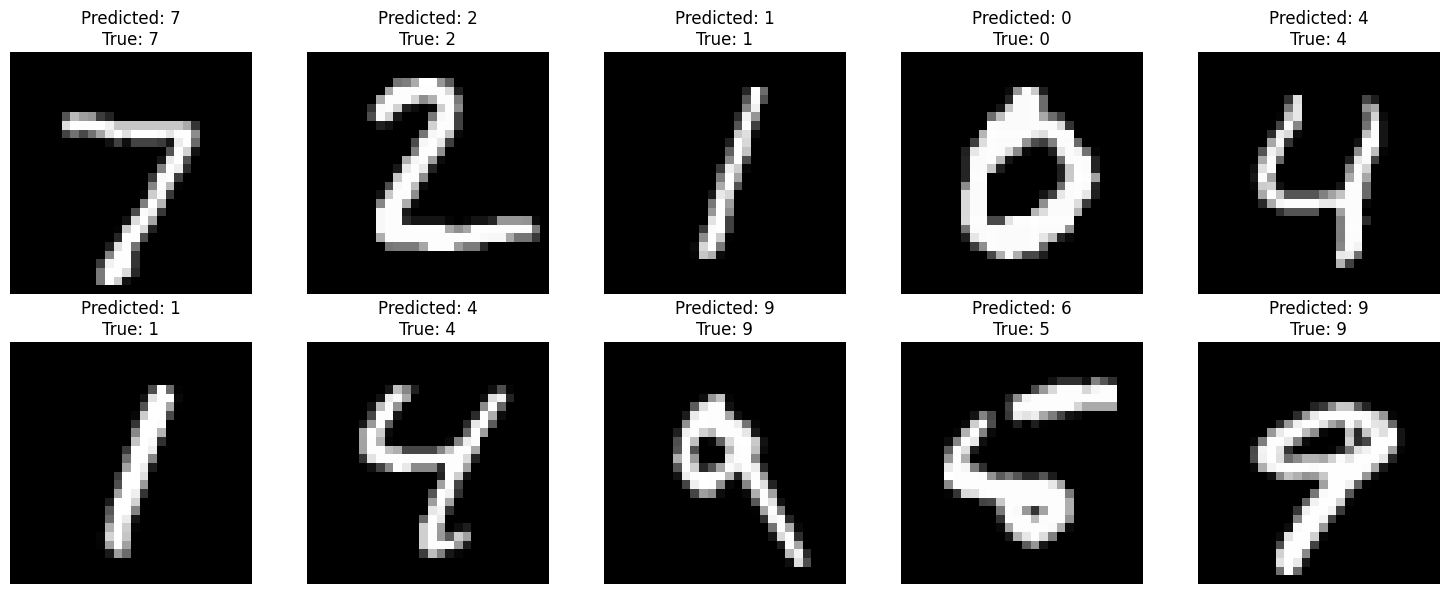

In [47]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model1(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


** for 2 epochs: MODEL 2**

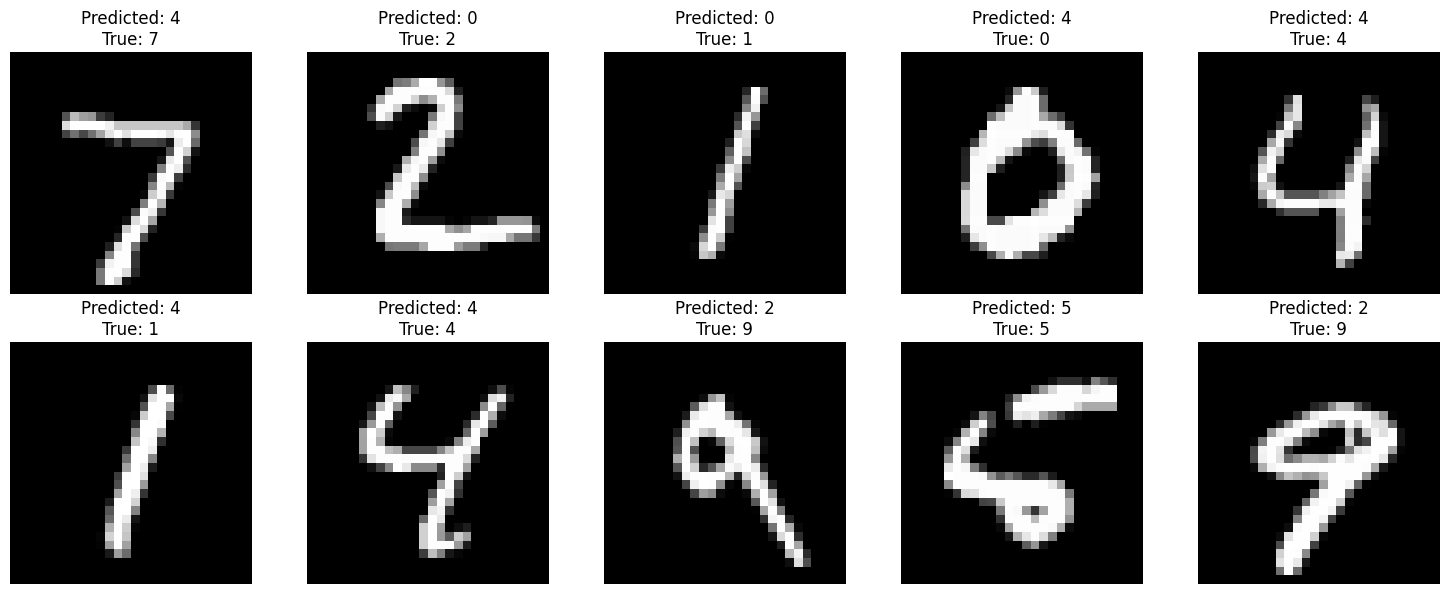

In [56]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model2(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


** for 20 epochs: MODEL 3**

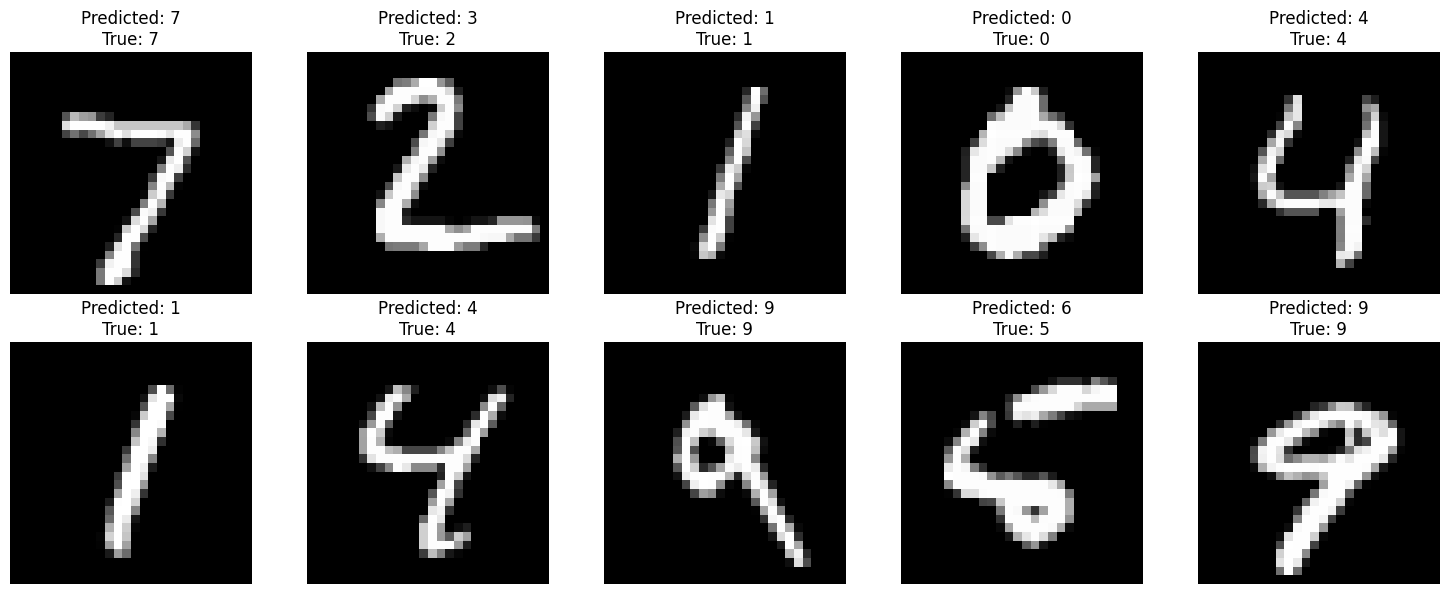

In [49]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model3(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


 Add another fully connected layer with ReLU activation: MODEL 4

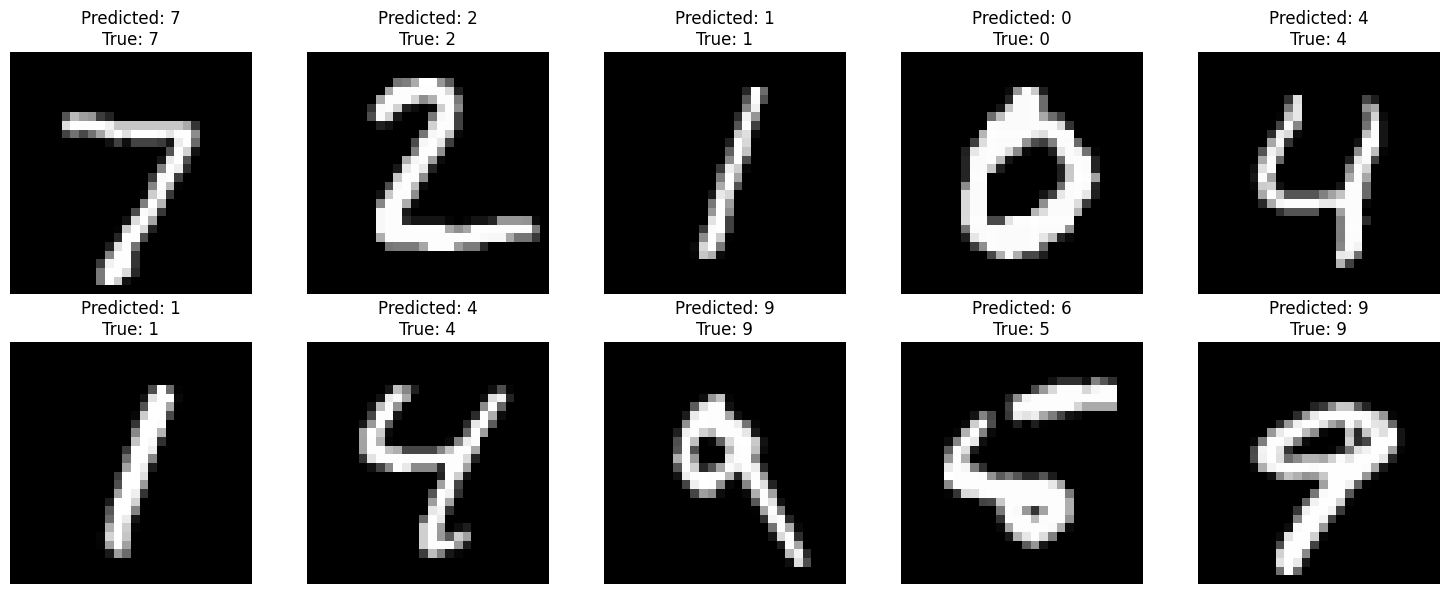

In [50]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model4(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


Increase the number of neurons in the hidden layers: MODEL 5

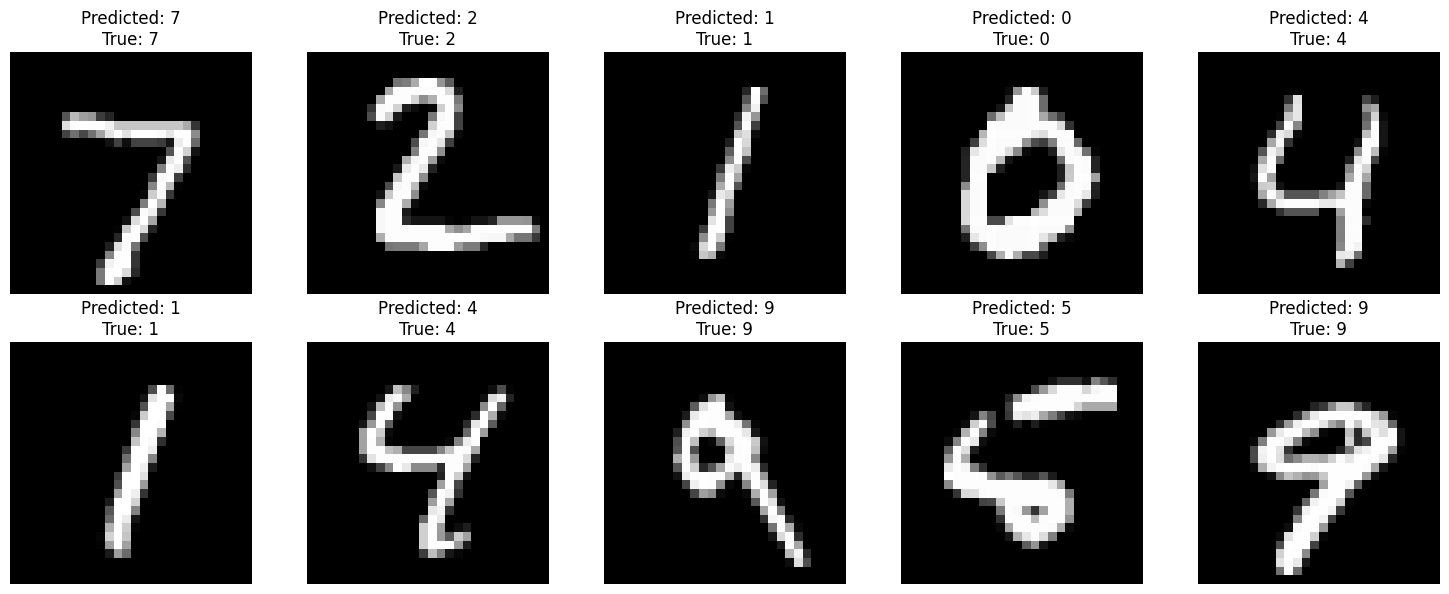

In [51]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model5(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


** Decrease the number of neurons in the hidden layers: MODEL 6**

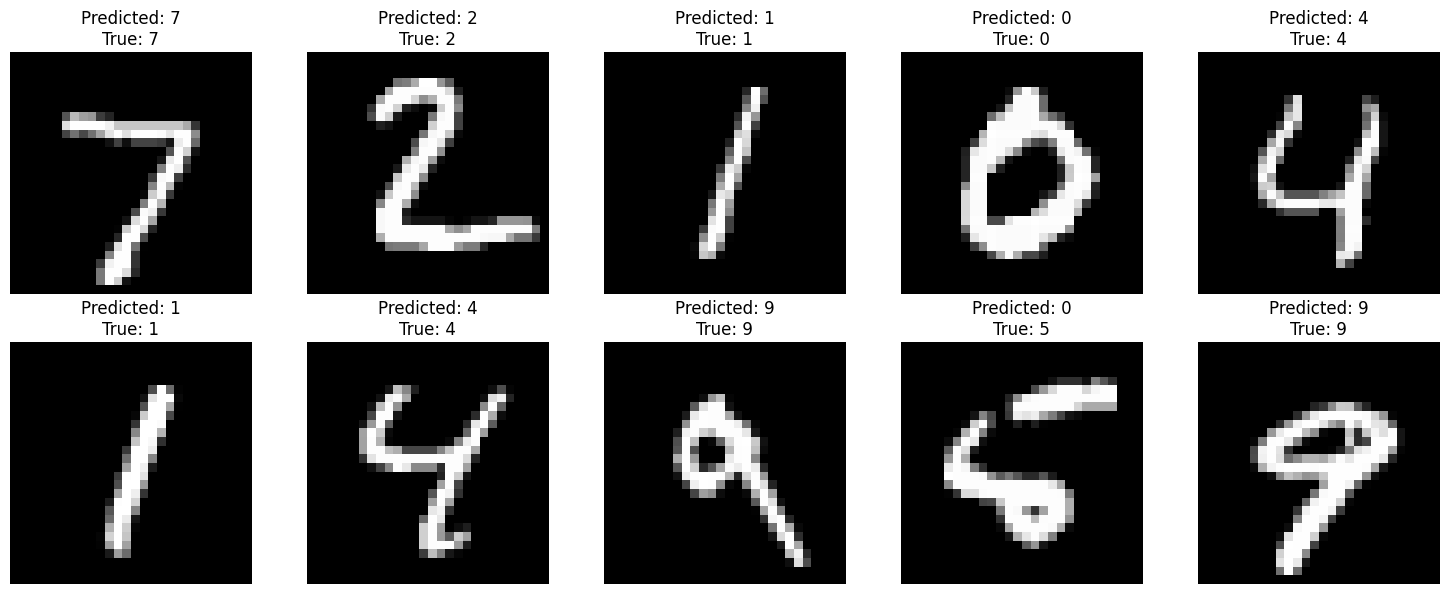

In [52]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model6(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


**modifying the dropout rate : MODEL 7**

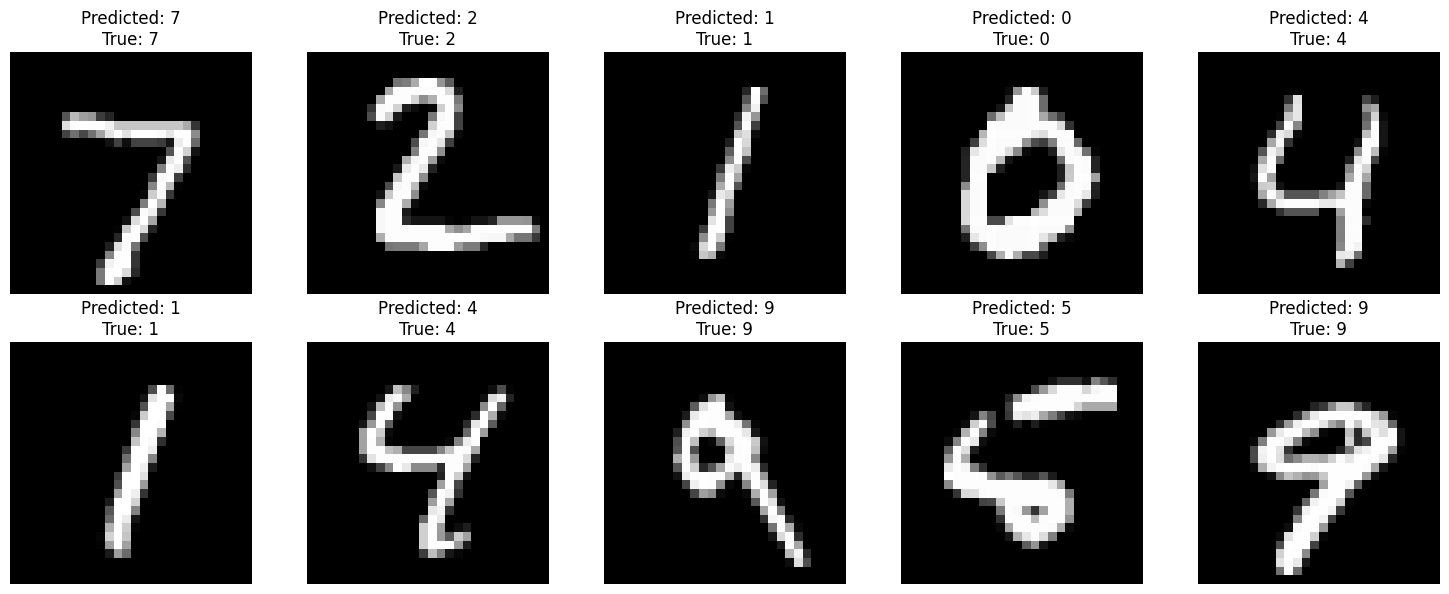

In [53]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model7(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


**additional ReLU and dropout : MODEL 8**

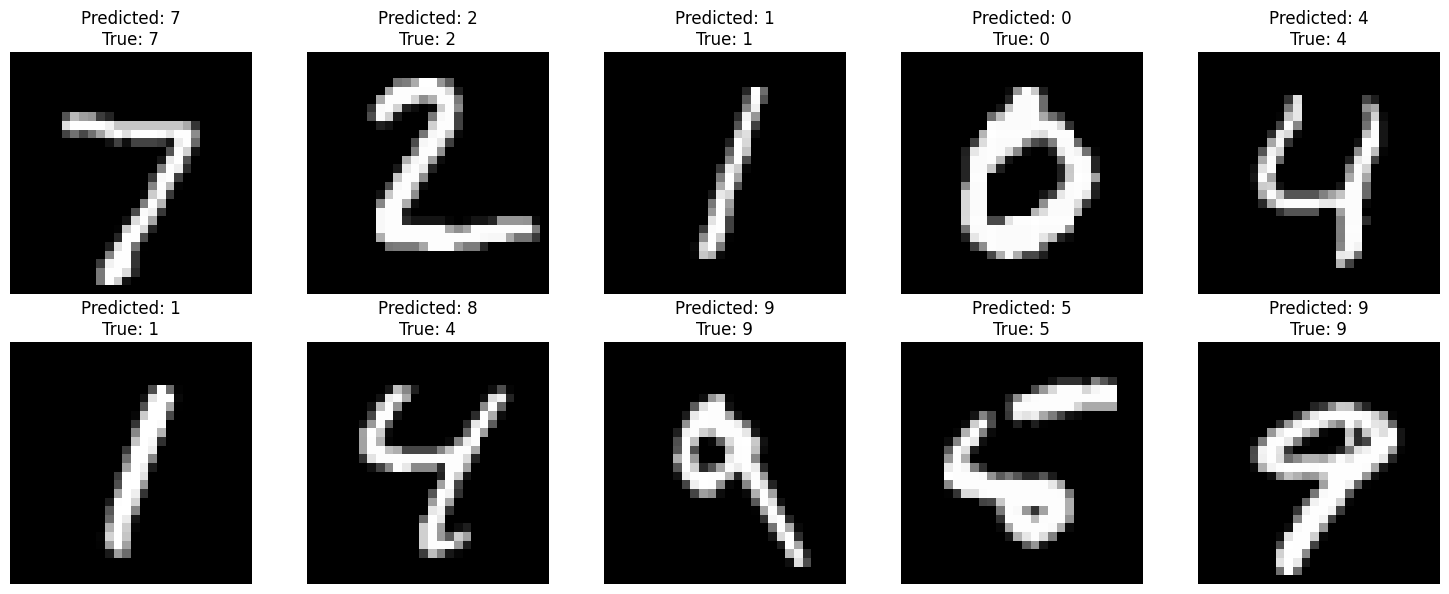

In [54]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model8(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)


**with all changes altogether : FOR MODEL 9**

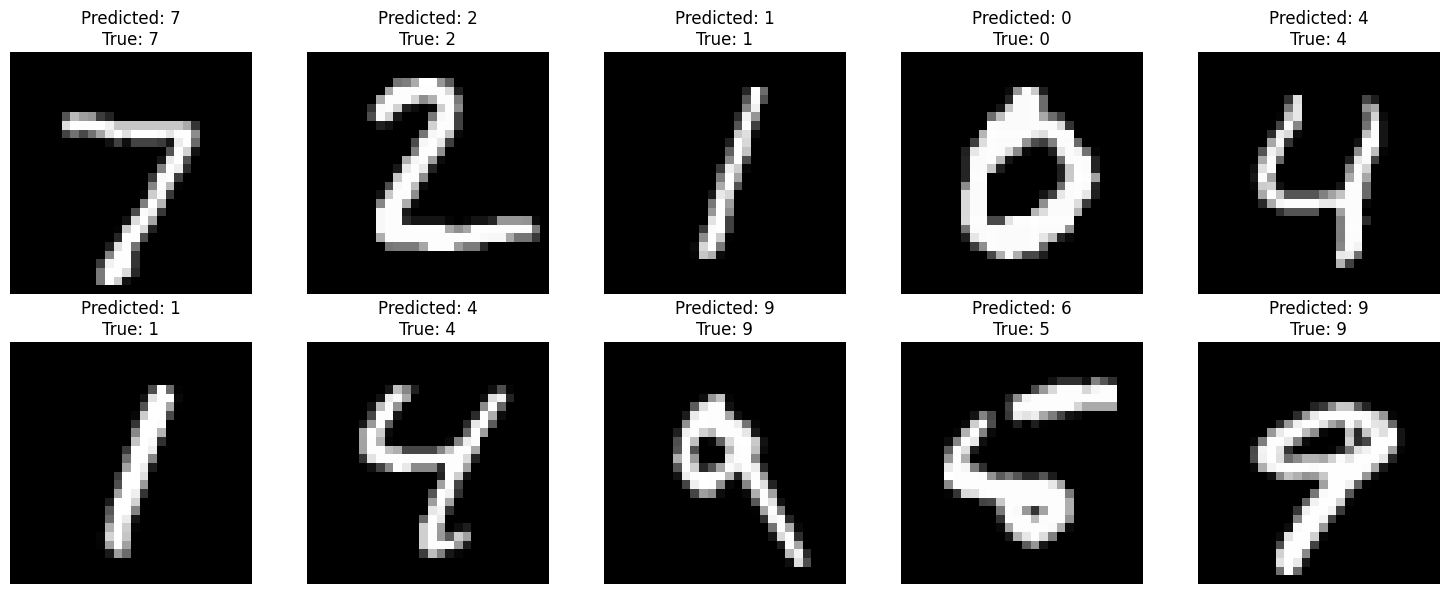

In [55]:
# Get a batch of test images and their true labels
images, labels = next(iter(testloader))

# Get the predicted labels
with torch.no_grad():
    log_ps = model9(images)
    _, predicted = torch.max(log_ps, 1)


# Visualize the images along with predicted and true labels
visualize_images(images, predicted, labels, classes)
